In [1]:
import requests
import altair as alt
import pandas as pd
from pandas.io.json import json_normalize

import re

%load_ext autoreload
%autoreload 2
%cd ../intervals
from main import *
from main_objs import *
import visualizations as viz
from ObservedPiece import ObservedPiece

/Users/dangtrang/OneDrive - brynmawr.edu/summer 2021/crim_intervals/intervals


# Validating from EMA to Ngrams

## The `getNgramsFromEma` output

In [7]:
from test_constants import model_0008, FUGA
model = ObservedPiece(model_0008)
ema = FUGA[0] # just a fuga I hardcoded in to test

model.getNgramsFromEma(ema)

Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0008.mei...
Successfully imported.


,[Superius],Altus,Tenor,Bassus,ema
184.0,NaN,"-2, -1",NaN,NaN,"23-29/2,2,1,1+3,1+3,1+4,4/@1,@1-3,@1,@1-3+@1,@..."
200.0,"-2, -1, 3, 1, 1",NaN,NaN,NaN,"23-29/2,2,1,1+3,1+3,1+4,4/@1,@1-3,@1,@1-3+@1,@..."
208.0,NaN,NaN,"-2, -1",NaN,"23-29/2,2,1,1+3,1+3,1+4,4/@1,@1-3,@1,@1-3+@1,@..."
224.0,NaN,NaN,NaN,"-2, -1","23-29/2,2,1,1+3,1+3,1+4,4/@1,@1-3,@1,@1-3+@1,@..."


## Method

- Calculated the Normalized Levenshtein similarity between every two pattern among the patterns that ema selected.
- Averaged those scores

In [51]:
def calculate_score(condition, kind, observationDf=pd.DataFrame()):
    """
    Return a series of average normalized levenshtein score for each ema.
    :param condition: to select specific areas of the dataframe to examine
    :param kind: kind of intervals
    """
    prefix = 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/'
    postfix = ".mei"
    if len(observationDf)==0:
        fileName = "../CRIM_Intervals_Notebooks/PEN_Detail_2.csv"
        df = pd.read_csv(fileName)
    else:
        df = observationDf

    df = df[condition]
    algorithm = NormalizedLevenshtein()
    scores = []
    for i in df.index:
        row = df.loc[i]
        model = ObservedPiece(prefix + row['piece.piece_id'] + postfix)
        ema_df = model.getNgramsFromEma(row['ema'], kind=kind)
        score_df = viz.compute_levenshtein_similarity(ema_df.drop(["ema"], axis=1), algorithm.similarity)
        scores.append(score_df.mean())
    return scores

## Plotting a histogram of PEN entries scores (PEN_entries_2.csv)

Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/

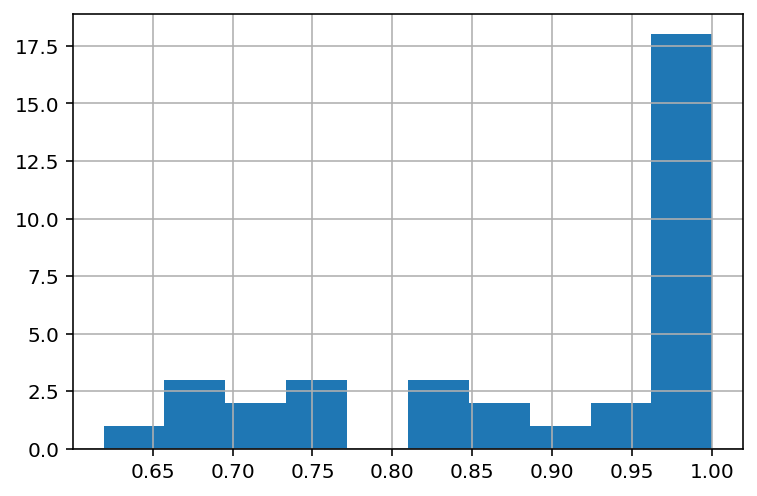

In [16]:
%%time
strict=df['mt_pe_strict']
strict_scores = calculate_score(strict, "z")
pd.Series(strict_scores).hist()

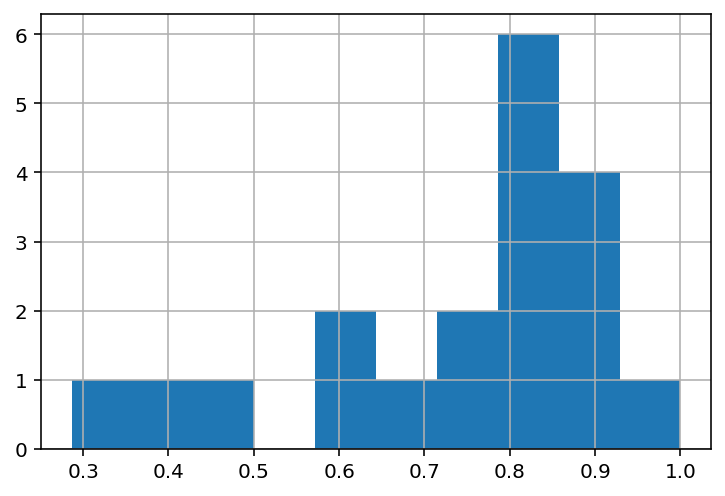

In [8]:
not_strict=!df['mt_pe_strict']
not_strict_scores = calculate_score(strict, "z")
pd.Series(not_strict_scores).hist()

**Comment**:
    
- Comparing Strict vs not strict, we can see how strict pens have a higher Levenshtein similarity score overall.
- However, non-strict pens still have a pretty high levenshtein score!

### Diatonic not flexed vs diatonic flexed

Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/

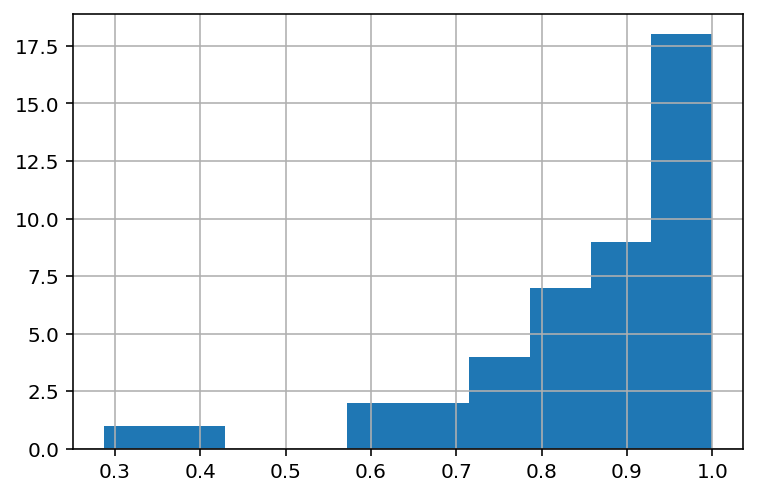

In [20]:
diatonic_strict=~df['diatonic_flex']
diatonic_strict_scores = calculate_score(diatonic_strict, "z")
pd.Series(diatonic_strict_scores).hist()

Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_3.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_4.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0019_4.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0003_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0003_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.c

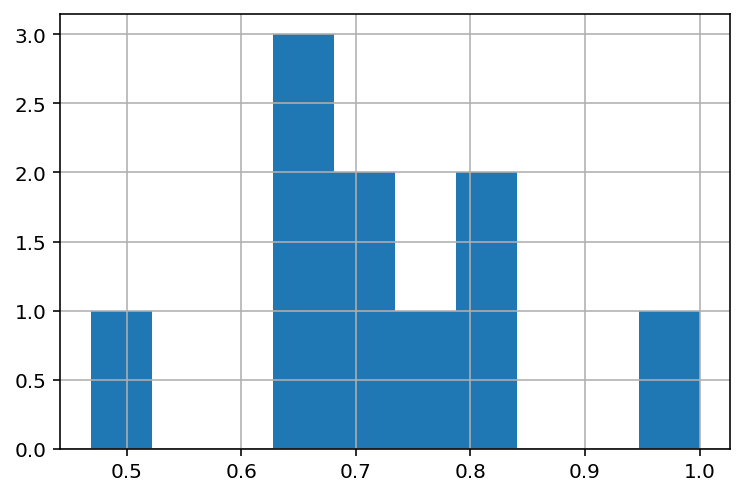

In [21]:
diatonic_flex=df['diatonic_flex']
diatonic_flex_scores = calculate_score(diatonic_flex, "z")
pd.Series(diatonic_flex_scores).hist()

**Important**:

- Some item has both `mt_pe_strict==mt_pe_flexed==False` 

In [27]:
fileName = "../CRIM_Intervals_Notebooks/PEN_Detail_2.csv"
df = pd.read_csv(fileName)
print(df['mt_pe_strict'][df['mt_pe_strict'] == df['mt_pe_flexed']])
df['mt_pe_flexed'][df['mt_pe_strict'] == df['mt_pe_flexed']]

11    False
12    False
13    False
14    False
15    False
27    False
29    False
37    False
39    False
40    False
41    False
46    False
Name: mt_pe_strict, dtype: bool


11    False
12    False
13    False
14    False
15    False
27    False
29    False
37    False
39    False
40    False
41    False
46    False
Name: mt_pe_flexed, dtype: bool

### Chromatic Flexed vs Chromatic not flexed

Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/

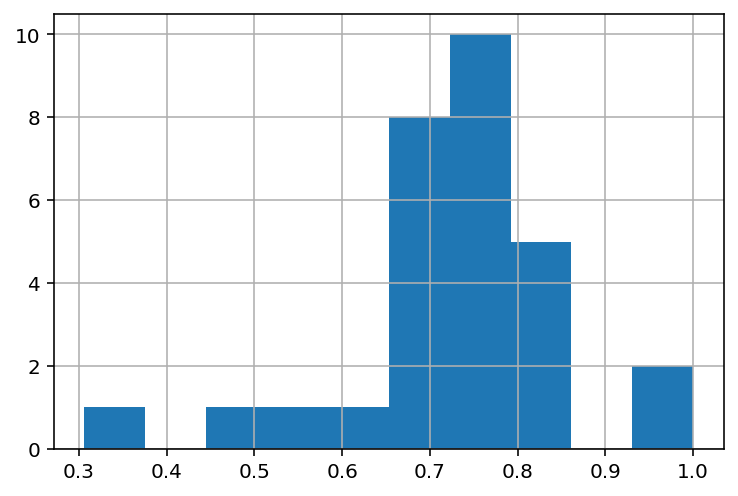

In [31]:
chromatic_flex=df['chromatic_flex']
chromatic_flex_scores = calculate_score(chromatic_flex, "c")
pd.Series(chromatic_flex_scores).hist()

Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_3.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_3.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0001.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0019_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0019.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0019.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/

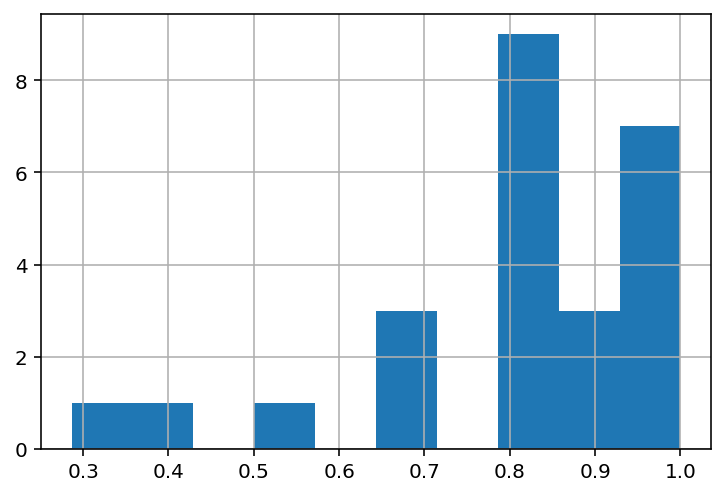

In [30]:
chromatic_not_flex=~df['chromatic_flex']
chromatic_not_flex_scores = calculate_score(chromatic_not_flex, "c")
pd.Series(chromatic_not_flex_scores).hist()

## Plotting Average Levenshtein similarity between different musical types

In [121]:
from matplotlib.backends.backend_pdf import PdfPages
df= pd.read_csv('../CRIM_Intervals_Notebooks/crim_observations.csv')

def calculate_score2(kind, importedModels, observationDf):
    """
    Return a series of average normalized levenshtein score for each ema.
    :param condition: to select specific areas of the dataframe to examine
    :param kind: kind of intervals
    """
    prefix = 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/'
    postfix = ".mei"
    df = observationDf

    algorithm = NormalizedLevenshtein()
    scores = []
    for i in df.index:
        row = df.loc[i]
        try:
            if row['piece.piece_id'] not in importedModels:
                model = ObservedPiece(prefix + row['piece.piece_id'] + postfix)
                importedModels[row['piece.piece_id']] = model
            else:
                model = importedModels[row['piece.piece_id']]
        except:
            print(row['piece.piece_id'])
            continue
            
        ema_df = model.getNgramsFromEma(row['ema'], kind=kind)
        score_df = viz.compute_levenshtein_similarity(ema_df.drop(["ema"], axis=1), algorithm.similarity)
        scores.append(score_df.mean())
    return scores

In [93]:
musical_types = df['musical_type'].unique()
imported_models = {}
musical_types[1:2]
# with PdfPages('multipage_pdf.pdf') as pdf:
#     for musical_type in musical_types[1:2]:
#         condition = df['musical_type']==musical_type
#         scores = calculate_score2(condition, 'z', imported_models, df)
#         print(musical_type)
#         pdf.savefig(pd.Series(scores).hist().show())
cond = df['musical_type']=='Periodic entry'
df2 = df[cond].head(100)
scores = calculate_score2('z', imported_models, df2)


Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0009_5.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_2.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Model_0017.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_1.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_3.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0015_4.mei...
Successfully imported.
Requesting file from https://raw.githubusercontent.co

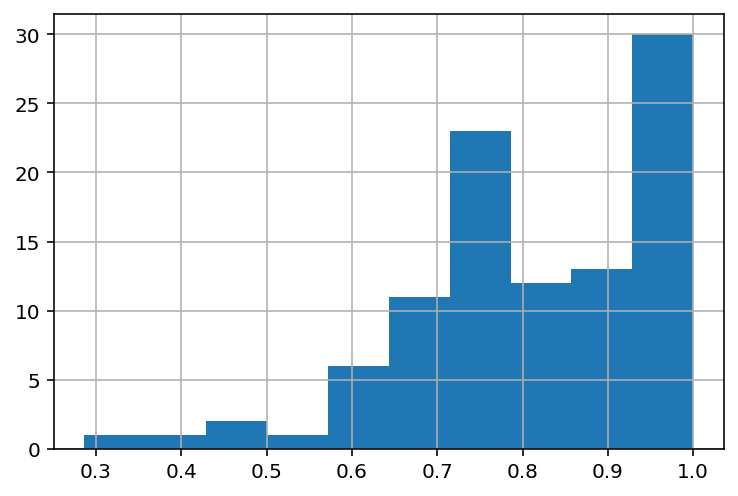

In [95]:
pd.Series(scores).hist()

In [133]:
musical_types = df['musical_type'].unique()
imported_models = {}
cond = df['musical_type']=='Periodic entry'
# periodic entries 101-115 safe
df2 = df[cond].iloc[145:146]#.to_dict()
# scores2 = calculate_score2('z', imported_models, df2)
df2.to_string()

'      Unnamed: 0                                             url    id                                                                                                                                             ema    musical_type  mt_cf mt_cf_voices  mt_cf_dur  mt_cf_mel  mt_sog mt_sog_voices  mt_sog_dur  mt_sog_mel  mt_sog_ostinato  mt_sog_periodic  mt_csog mt_csog_voices  mt_csog_dur  mt_csog_mel  mt_cd mt_cd_voices  mt_fg mt_fg_voices mt_fg_int mt_fg_tint  mt_fg_periodic  mt_fg_strict  mt_fg_flexed  mt_fg_sequential  mt_fg_inverted  mt_fg_retrograde  mt_pe                          mt_pe_voices mt_pe_int mt_pe_tint  mt_pe_strict  mt_pe_flexed  mt_pe_flt  mt_pe_sequential  mt_pe_added  mt_pe_invertible  mt_id mt_id_voices mt_id_int mt_id_tint  mt_id_strict  mt_id_flexed  mt_id_flt  mt_id_invertible  mt_nid mt_nid_voices mt_nid_int mt_nid_tint  mt_nid_strict  mt_nid_flexed  mt_nid_flt  mt_nid_sequential  mt_nid_invertible  mt_hr mt_hr_voices  mt_hr_simple  mt_hr_staggered  mt_hr_sequ

In [ ]:
pd.Series(scores2).hist()

## Not working ema address 

Trying to explore with the ema addresses that aren't working!

In [51]:
piece = ObservedPiece("https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0014_3.mei")

Requesting file from https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_3.0/CRIM_Mass_0014_3.mei...
Successfully imported.


In [52]:
# First, check if retrieved the correct beats and measures
piece.getNoteRest().loc[1674:1684]

,Sup[erius],Contratenor,Tenor,Bassus
1674.0,NaN,D4,F4,NaN
1678.0,NaN,C4,E4,NaN
1679.0,NaN,B-3,D4,NaN
1680.0,NaN,C4,E4,A3
1684.0,A4,D4,F4,D3


In [53]:
ms = piece.getMeasure()
ms[(ms == 206) | (ms == 207)].dropna()

,Sup[erius],Contratenor,Tenor,Bassus
1676.0,206.0,206.0,206.0,206.0
1684.0,207.0,207.0,207.0,207.0


In [54]:
piece.getTimeSignature()

,Sup[erius],Contratenor,Tenor,Bassus
0.0,4/2,4/2,4/2,4/2
864.0,3/1,3/1,3/1,3/1
900.0,8/2,8/2,8/2,8/2
916.0,4/2,4/2,4/2,4/2
1084.0,8/2,8/2,8/2,8/2
1100.0,4/2,4/2,4/2,4/2
1588.0,8/2,8/2,8/2,8/2
1604.0,4/2,4/2,4/2,4/2
2220.0,3/1,3/1,3/1,3/1
2364.0,8/2,8/2,8/2,8/2


In [55]:
beats = piece.getBeat()
beats.loc[1674:1684]

,Sup[erius],Contratenor,Tenor,Bassus
1674.0,NaN,2.0,2.0,NaN
1678.0,NaN,4.0,4.0,NaN
1679.0,NaN,4.5,4.5,NaN
1680.0,NaN,1.0,1.0,1.0
1684.0,3.0,3.0,3.0,3.0


In [56]:
piece.getDuration().loc[1674:1684]

,Sup[erius],Contratenor,Tenor,Bassus
1674.0,NaN,4.0,4.0,NaN
1678.0,NaN,1.0,1.0,NaN
1679.0,NaN,1.0,1.0,NaN
1680.0,NaN,4.0,4.0,4.0
1684.0,3.0,4.0,3.0,3.0


In [57]:
piece._getM21ObjsNoTies().loc[1674:1684]

,Sup[erius],Contratenor,Tenor,Bassus
1674.0,NaN,<music21.note.Note D>,<music21.note.Note F>,NaN
1678.0,NaN,<music21.note.Note C>,<music21.note.Note E>,NaN
1679.0,NaN,<music21.note.Note B->,<music21.note.Note D>,NaN
1680.0,NaN,<music21.note.Note C>,<music21.note.Note E>,<music21.note.Note A>
1684.0,<music21.note.Note A>,<music21.note.Note D>,<music21.note.Note F>,<music21.note.Note D>


In [58]:
piece._getM21ObjsNoTies().loc[1674:1684].applymap(lambda note: note.beat, na_action='ignore')

,Sup[erius],Contratenor,Tenor,Bassus
1674.0,NaN,2.0,2.0,NaN
1678.0,NaN,4.0,4.0,NaN
1679.0,NaN,4.5,4.5,NaN
1680.0,NaN,1.0,1.0,1.0
1684.0,3.0,3.0,3.0,3.0


In [60]:
piece.detailIndex(df=piece.getNoteRest()).loc[205:207]

Sup[erius] Contratenor Tenor Bassus
Measure Beat                                    
205     1.0         NaN          D4    D4    NaN
        1.5         NaN          C4    E4    NaN
        2.0         NaN          D4    F4    NaN
        3.0          A4          F4    D4     D3
        4.5         NaN          E4    C4    NaN
206     1.0         NaN          C4    E4     A3
        4.0         NaN          C4    E4    NaN
        4.5         NaN         B-3    D4    NaN
207     1.0          A4        Rest    D4     F3
        1.5         NaN         NaN    C4    NaN
        2.0         B-4          F4    D4    B-2
        3.0          A4          D4    F4     D3
        4.5          G4         NaN    E4     E3

In [61]:
piece.detailIndex(df=piece._getM21ObjsNoTies).loc[205:207]

TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid